# Predictions based on fourth vector - v4

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* Age
* TMV (Total Market Value)
* Forma (zwycięstwa/przegrane) z ostatnich 3 meczów
* Forma (zwycięstwa/przegrane) z ostatnich 5 meczów 
* Średnia liczba oddanych strzałów z ostatnich 3 meczów
* Średnia liczba oddanych strzałów z ostatnich 5 meczów
* Średnia liczba strzałów na bramkę z ostatnich 3 meczów
* Średnia liczba strzałów na bramkę z ostatnich 5 meczów

In [2]:
model_data = pd.read_csv('learning_vectors/v04/version04-shotstransfermarkt_noNaNs.csv', sep=',')

# model_data = model_data.set_index(['Match_id'])
# model_data = model_data.sort_values(['League_id', 'Date'])
# model_data.columns = [
#     'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
#     'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST',
#     'H_age', 'A_age',
#     'H_TMV', 'A_TMV',
#     'H_Form03', 'A_Form03',
#     'H_Form05', 'A_Form05',
#     'H_MeanShots03', 'A_MeanShots03',
#     'H_MeanShots05', 'A_MeanShots05',
#     'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
#     'H_Better_MeanShotsOnTarget05', 'A_Better_MeanShotsOnTarget05'
# ]

print(model_data.shape)
# model_data.head()


(6069, 30)


In [3]:
#Check for nulls
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison

In [4]:
features = [
    'H_age', 'A_age',
    'H_TMV', 'A_TMV',
    'H_Form03', 'A_Form03',
    'H_Form05', 'A_Form05',
    'H_MeanShots03', 'A_MeanShots03',
    'H_MeanShots05', 'A_MeanShots05',
    'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03',
    'H_Better_MeanShotsOnTarget05', 'A_Better_MeanShotsOnTarget05'
]

cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
scoring_type = 'accuracy'

f = open('results_v4.txt','w')

print(model_data[features].shape)
model_data[features].head()

(6069, 16)


,H_age,A_age,H_TMV,A_TMV,H_Form03,A_Form03,H_Form05,A_Form05,H_MeanShots03,A_MeanShots03,H_MeanShots05,A_MeanShots05,H_MeanShotsOnTarget03,A_MeanShotsOnTarget03,H_Better_MeanShotsOnTarget05,A_Better_MeanShotsOnTarget05
0,21.3,24.6,250.0,64.0,4,1,7,1,19.000000,11.333333,15.8,10.2,10.666667,5.333333,9.4,4.2
1,24.9,23.9,91.0,257.0,0,6,3,12,5.333333,16.333333,7.0,15.0,2.333333,8.000000,3.8,8.0
2,24.3,25.7,80.0,61.0,4,3,5,5,10.666667,13.000000,11.6,14.6,5.666667,6.333333,7.0,8.0
3,24.4,26.4,162.0,86.0,6,4,10,4,10.000000,11.666667,11.4,11.8,5.333333,7.000000,6.0,6.4
4,22.3,22.5,73.0,212.0,7,4,11,7,10.000000,8.333333,11.2,9.2,6.666667,5.000000,6.2,5.4


In [5]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



In [6]:
ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

def compare_algs(X, y, cross_validator, scoring_type, title="-- Other comparison --"):
    
    print (title)
    f.write(title+"\n")

    topic = "Algo: \tres.mean: \tres.std:"
    print (topic)
    f.write(topic+"\n")
    
    results = []
    names = []
    for name, model in ALGS:
        result = model_selection.cross_val_score(model, X, y,
                                              cv=cross_validator,
                                              scoring=scoring_type)
        results.append(result)
        names.append(name)
        info = "%s  \t%f \t(%f)" % (name, result.mean(), result.std())
        f.write(info+"\n")
        print(info)

    f.write("\n\n")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()


### Basic compraison: 

--- Basic comparison of algorithms  ---
Algo: 	res.mean: 	res.std:
LR  	0.534683 	(0.014467)
LDA  	0.532377 	(0.007613)
KNN  	0.481796 	(0.015618)
CART  	0.414732 	(0.007900)
NB  	0.487063 	(0.014832)
SVM  	0.468775 	(0.013434)


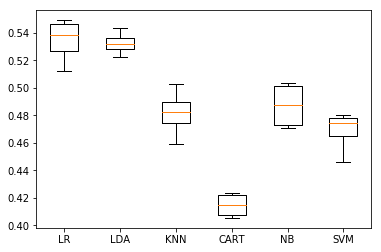

In [7]:
X = model_data[features]
y = model_data['Result']

title = "--- Basic comparison of algorithms  ---"

compare_algs(X, y, cross_validator, scoring_type, title)


### Basic comparison with preprocessing:

--- Basic comparison with preprocessing  ---
Algo: 	res.mean: 	res.std:
LR  	0.532710 	(0.010057)
LDA  	0.533861 	(0.006527)
KNN  	0.479977 	(0.012561)
CART  	0.414400 	(0.009036)
NB  	0.486735 	(0.006295)
SVM  	0.529908 	(0.015328)


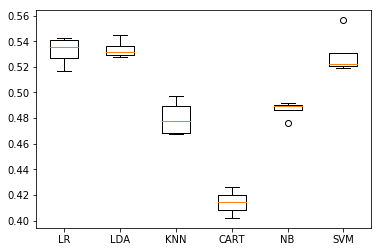

In [8]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

title = "--- Basic comparison with preprocessing  ---"

compare_algs(X, y, cross_validator, scoring_type, title)
